In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
filename_queue = tf.train.string_input_producer(
#     tf.train.match_filenames_once("../data/*.jpg"))
    tf.train.match_filenames_once("sample_data/1.jpg"))
image_reader = tf.WholeFileReader()

In [48]:
filename, image_file = image_reader.read(filename_queue)
image = tf.image.decode_jpeg(image_file)
image1 = tf.image.resize_image_with_crop_or_pad(image, 280, 280)
image2 = tf.image.resize_images(image, [280, 280])

In [49]:
with tf.Session() as sess:
    # Required to get the filename matching to run.
    tf.local_variables_initializer().run()
    # Coordinate the loading of image files.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    # Get an image tensor and print its value.
    image_tensor = sess.run([image2])
    print(np.shape(image_tensor))
    

    # Finish off the filename queue coordinator.
    coord.request_stop()
    coord.join(threads)

(1, 280, 280, 3)


(280, 280, 3)


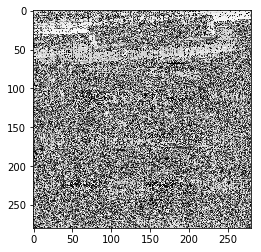

In [50]:
img = np.array(image_tensor)[0,:,:,:]
print(img.shape)
plt.imshow(img)